## 1st Class - Textual Data

> Date: June 01 (2020)

- **Abstract:** This is the first class of the course of natural language, by [Alura](https://cursos.alura.com.br/course/introducao-a-nlp-com-analise-de-sentimento). We are going to use NPL to classify and interpret what some things related to natural language mean.

- We are going to create a sentiment analyzer using a data base of the IMDb automaticcally translated to pt-BR. This dataset can be found in [Kaggle](https://www.kaggle.com/luisfredgs/imdb-ptbr/data)

- To to this, we need to convert our dataset to something that the computer can interprete and analyze. 


In [9]:
import pandas as pd
import numpy as np

SEED = 15
np.random.RandomState(seed = SEED)
review = pd.read_csv('imdb-reviews-pt-br.csv')
review.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(review.text_en, review.sentiment, random_state = SEED)
x_train

28119    From the start, you know this is a Sam Sherman...
9360     When i saw the first octopus movie it was a la...
24330    I saw Five Fingers at the Drive-In in...what, ...
5982     Interesting concept that just doesnt make it. ...
4932     The clever marketeer is he is, Jess Franco nat...
                               ...                        
39296    I have never seen a show as good as Full House...
49015    yes i have a copy of it on VHS uncut in great ...
2693     Theres nothing to say except I want my time ba...
8076     About your terrible movie copying Beethoven. A...
7624     I watched the Halloween episode...oh my god I ...
Name: text_en, Length: 37094, dtype: object

In [11]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver = 'lbfgs')
log_reg.fit(x_train, y_train)
accuracy = score(x_test, y_test)

ValueError: could not convert string to float: 'From the start, you know this is a Sam Sherman film more than an Al Adamson film because as the credits roll, "A Sam Sherman Production" appears in letters as big as the title credit. Not only that, Mr. Sherman co-wrote the screenplay and it was his idea to use Bob Livingstone, a washed-up, 69 year old Western star of the old Hollywood era to be his male lead in a picture that Sherman thought would capitalize on the recent success of "Swinging Stewardesses". Now why would you want to have a wrinkled old man as your male lead in what is supposed to be a soft-core exploitation feature? It defies explanation, but that is Sam Sherman for you. His obsession with old Hollywood colored a lot of his films for Independent International Pictures, and he and Al Adamson frequently tried to get has-been actors for their films e.g. J. Carrol Naish, Russ Tamblyn, Lon Chaney Jr.,etc.. But Bob Livingstone? Tell me the drive-in demographic knew who this 40s second-rater was; its ridiculous! But then again, "Naughty Stewardesses" was a successful picture for them, so we cant just write this off as a Sherman fiasco. Still, by any aesthetic standard, its an incoherent mess. Al Adamson wanted out of this picture, and it is easy to see why. First off, it has no genre focus at all and drifts around from super soft core tits and ass/simulated sex only to a kidnapping thriller shades of Stecklers "Rat Pfink and Boo Boo"! In between, we get subjected to painfully boring sequences of the stewardesses traipsing around Vegas to the hackneyed music of Sparrow, or Richard Smedley and Connie Hoffmann on a photo shoot in San Francisco. Worst of all, we get Bob Livingstone as a Jack LaLanne wannabe in a blue jumpsuit trying to be sexy...gag! Thankfully, his big sex scene with Connie Hoffmann was deleted, but you can catch him slurping on her titties on the DVD in the Special Features section. Creepy. This is a terrible, terrible movie, but Ill give it three stars for Gary Gravers photography and out of sympathy to Connie Hoffmann for having to make it with "Wrinkles" Livingstone. "Naughty Stewardesses" is for Al Adamson completists and/or scholars of exploitation film as Sam Shermans commentary offers vital inside info. All others, BEWARE.'

In [17]:
# Now we need to convert our data to something that the computer can understand
# 0 - bad    1 - good

review["classification"] = review.sentiment.replace(["neg", "pos"], [0, 1])
print(review["classification"])

0        0
1        0
2        0
3        0
4        0
        ..
49454    1
49455    1
49456    1
49457    1
49458    1
Name: classification, Length: 49459, dtype: int64


In [18]:
# Verifying if the data is balanced (there are around the same quantity of 0 and 1)
review.classification.value_counts()
# In this case, we have 50% of zeros and 50% of ones, approximately. 
# That means that we don't need to worry with problems of inbalanced data

0    24765
1    24694
Name: classification, dtype: int64

## 2nd Class - Bag of words

> Date: June 03 (2020)

- **Definition of Natural language processing:** A sub-area of the artificial intelligence trying to understand the human language and machine learning. The question is: how the computer can process and analyze the human language.

- Now we are going to represent the text in a form that the machine learning model can process.
- Corpus textual - A set of all text documents that make up the context
- Vocabulary - All words into the corpus textual, without repeat anyone.
    - Example: 
    
##### Corpus textual
                This movie is very good
                This movie is very bad
                This movie is very very good
                This movie is terrible
                
##### Number of times each word appears (Bag of words)
    
|       Phrase               | The | movie | is | very |good | bad | terrible |
|:--------------------------:|:---:|:-----:|:--:|:----:|:---:|:---:|:--------:|
|     The movie is good      |  1  |   1   |  1 |   1  |  1  |  0  |    0     |
|      The movie is bad      |  1  |   1   |  1 |   1  |  0  |  1  |    0     |
|This movie is very very good|  1  |   1   |  1 |   2  |  1  |  0  |    0     |
|   This movie is terrible   |  1  |   1   |  1 |   0  |  0  |  0  |    1     |

> This method is good to verify how the words and the number of repetitions can influnce in what someone wants to say

## Example of how to construct a Bag of words

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

# Corpus textual
text = ["This is a bad movie", "This is a good movie"] 

vectorize = CountVectorizer(lowercase = False)
bag_of_words = vectorize.fit_transform(text)

In [20]:
sparse_matrix = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns = vectorize.get_feature_names())
print(sparse_matrix)

   This  bad  good  is  movie
0     1    1     0   1      1
1     1    0     1   1      1


## Trying with a real data

In [21]:
vectorize = CountVectorizer(lowercase = False, max_features = 400)
bag_of_words = vectorize.fit_transform(review.text_en) # Or text_pt, if you want
sparse_matrix = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns = vectorize.get_feature_names())
# print(sparse_matrix)

In [22]:
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(bag_of_words, review.classification, random_state = SEED)
log_reg = LogisticRegression(solver = 'lbfgs', max_iter = 200)
log_reg.fit(x_train, y_train)
accuracy = log_reg.score(x_test, y_test)
print("Accuracy: %.2f%%" % (accuracy*100))

# The Accuracy was increased raising the maximum quantity of features (before and into the class was used 50. Now, I'm using 400 words)

Accuracy: 81.63%


In [23]:
def text_classifier(text, text_column, classification_column):
    vectorize = CountVectorizer(lowercase = False, max_features = 400)
    bag_of_words = vectorize.fit_transform(text[text_column])
    x_train, x_test, y_train, y_test = train_test_split(bag_of_words, text[classification_column], random_state = SEED)
    log_reg = LogisticRegression(solver = 'lbfgs', max_iter = 200)
    log_reg.fit(x_train, y_train)
    accuracy = log_reg.score(x_test, y_test) * 100
    return accuracy


print("Accuracy: %.2f%%" % text_classifier(review, "text_en", "classification"))

Accuracy: 81.63%


## 3rd Class - Word Cloud

> Date: June 05 (2020)

- **Abstract:** In this step I'm making a word cloud of the project.

### What is a Word cloud?

- Is a method to visualize the words where the most common are greater and the others are shorter.
- The library used here is WordCloud. [GitHub](https://github.com/amueller/word_cloud) and [documentation](https://amueller.github.io/word_cloud/) available and all that we need to use the it is there (examples, functions, figures etc)

> Obs.: You need to install the library first and then you'll be able to run this code

- **Example (from the cited source):**

![Word Cloud with customized colours](https://amueller.github.io/word_cloud/_images/sphx_glr_a_new_hope_001.png)

In [24]:
%matplotlib inline

from wordcloud import WordCloud

all_words = ' '.join(text for text in review.text_en)
word_cloud = WordCloud(width = 800, height = 500, 
                      max_font_size = 110,
                      collocations = False,
                      contour_color = "black",
                      contour_width = 2,
                      background_color = "white").generate(all_words)

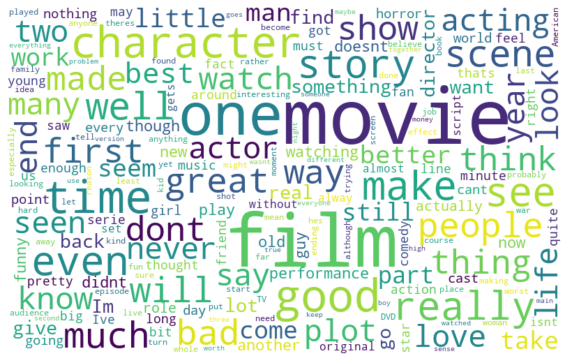

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 8))
plt.imshow(word_cloud,
          interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [41]:
def generate_word_cloud(text, text_column, classification_column, target_result, color_map = "viridis"):
    filtered_text = text[text[classification_column] == target_result]
    all_words = ' '.join(text for text in filtered_text[text_column])
    word_cloud = WordCloud(width = 800, height = 500, 
                          max_font_size = 110,
                          collocations = False,
                          background_color = "whitesmoke",
                          colormap = color_map).generate(all_words)
    
    plt.figure(figsize = (10, 8))
    plt.imshow(word_cloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.show()
    return all_words

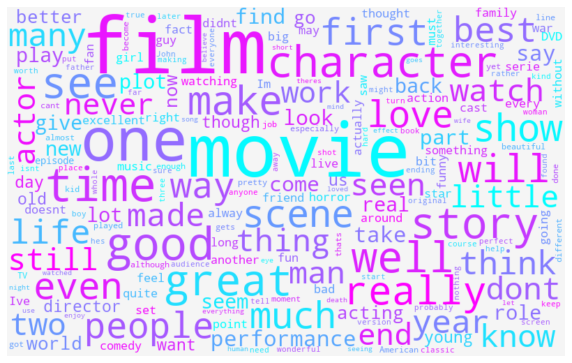

In [27]:
# Show positive comments
generate_word_cloud(review, "text_en", "classification", 1, color_map = "cool")

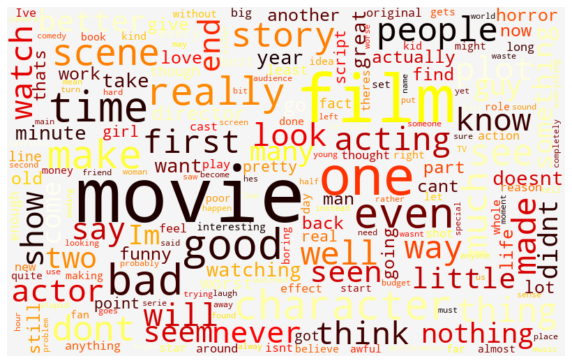

In [28]:
# Show negative comments
generate_word_cloud(review, "text_en", "classification", 0, color_map = "hot")

## 4rd Class - NLTK

> Date: June 08 (2020)

- NLTK: Natural Language Toolkit 

> Obs.: You need to install the library. Use pip to install then run the cell below (uncomment before) to download everything that you need to use the library.

- We're going to use this library to see what words appear more frequently (the 10, 20 or 50 most common, for example)


In [29]:
# import nltk

# nltk.download("all")

### Example

In [37]:
import nltk

text = ['This movie is bad', 'This movie is good']
nltk.FreqDist(text)

FreqDist({'This movie is bad or This movie is good': 1})

 - With this we can note that it's showing the frequency of the phrases, not the words. To change it:

### Tokenization

Process to separate the words. Here we'll to that by the white spaces

#### Example

In [42]:
from nltk import tokenize

phrase = "I hated this film"
space_token = tokenize.WhitespaceTokenizer()
word_token = phrase_space.tokenize(phrase)
print(word_space)

['I', 'hated', 'this', 'film']


#### Applying in the project

In [47]:
space_token = tokenize.WhitespaceTokenizer()
word_token = phrase_space.tokenize(all_words)
words_frequency = nltk.FreqDist(word_token)

In [48]:
words_frequency

FreqDist({'the': 541903, 'a': 294097, 'and': 290407, 'of': 269316, 'to': 248555, 'is': 194182, 'in': 162011, 'I': 131434, 'that': 120419, 'this': 110592, ...})

In [54]:
df_words_frequency = pd.DataFrame({"Words": list(words_frequency.keys()), 
            "Frequency": list(words_frequency.values())}).nlargest(columns = "Frequency", n = 15)
df_words_frequency

,Words,Frequency
16,the,541903
7,a,294097
41,and,290407
21,of,269316
87,to,248555
59,is,194182
39,in,162011
27,I,131434
154,that,120419
99,this,110592
